In [1]:
# imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data extraction
file_path_train = 'KDDTrain+.txt'
file_path_test = 'KDDTest+.txt' 

df = pd.read_csv(file_path_train)
test_df = pd.read_csv(file_path_test)

In [3]:
# adding cols 
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns
test_df.columns = columns

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
# for col in list(df.columns):
#     print(f"{col} : {df[col].dtype}")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [5]:
df["attack"].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [6]:
# Data Trasformation 
is_attack_train = df.attack.map(lambda x: 0 if x == 'normal' else 1)
is_attack_test = test_df.attack.map(lambda x: 0 if x == 'normal' else 1)

df['attack_flag'] = is_attack_train
test_df['attack_flag'] = is_attack_test

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [7]:
test_df["attack"].value_counts()

normal             9711
neptune            4656
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: attack, dtype: int64

In [8]:
# df['attack'].value_counts().unique

In [9]:
# merge in common type

# Denial of Service (DoS) – A malicious attempt toblock system or network resources and services.
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']

# Probe – This attack collects the information about potential vulnerabilities of the target system that 
# can be used to later be used to launch attacks on those systems
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']

#   User to Root (U2R) – rivilege_attacks :  In this, attackers access the system as a normal user and break the vulnerabilities 
#   to gain administrative privileges.
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']

# Remote to Local (R2L) – access_attacks:  Unauthorized ability to dump data packets to remote system over network and
# gain access either as a user or root to do their unauthorized activity.
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

In [10]:
attack_labels = ["Normal 0 ", "DoS 1", "Probe 2", "U2R 3 ", "Sybil R4 "]
# R2L ==> SYBIL  according to paper 
def attackMapper(attack):
    
    if attack in dos_attacks:
        attack_type = 1 #DoS
    elif attack in probe_attacks:
        attack_type = 2 #Probe
    elif attack in privilege_attacks :
        attack_type = 3 #U2R
    elif attack in access_attacks:
        attack_type = 4 #4Sybil
    else:
        attack_type = 0 #0Normal
    return attack_type

train_attack_map = df.attack.apply(attackMapper)
df['attack_map'] = train_attack_map

test_attack_map = test_df.attack.apply(attackMapper)
test_df['attack_map'] = test_attack_map

# df.head()
df['attack_map'].value_counts()

0    67351
1    45927
2    11656
4      995
3       43
Name: attack_map, dtype: int64

In [11]:
# data profiling : analysis by protocol
attack_vs_protocol = pd.crosstab(df.attack, df.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


In [12]:
attackMap_vs_protocol = pd.crosstab(df.attack_map, df.protocol_type)
attackMap_vs_protocol
#attack_labels = ["Normal 0 ", "DoS 1", "Probe 2", "U2R 3 ", "Sybil R4 "]

protocol_type,icmp,tcp,udp
attack_map,,,
0,1309,53608,12434
1,2847,42188,892
2,4135,5857,1664
3,0,40,3
4,0,995,0


In [13]:
# some visualizations


# SORCE : Internet
import itertools
def make_pie(data_list,labels):
    list_len = len(data_list)
    
    color_list = sns.color_palette()
    color_style = itertools.cycle(color_list)
    cdict = {}
    
    fig,ax = plt.subplots(1,list_len,figsize=(18,10),tight_layout=False)
    plt.subplots_adjust(wspace = 1/list_len)
    
    for count,data  in enumerate(data_list):
        for num,value in enumerate(np.unique(data.index)):
            if value not in cdict:
                cdict[value] = next(color_style)
                
        wedges,texts = ax[count].pie(data,colors =[cdict[v] for v in data.index])
        ax[count].legend(wedges,data.index,title = "Flags",loc="center left",bbox_to_anchor = (1,0,0.5,1))
        ax[count].set_title(labels[count])

    return ax    


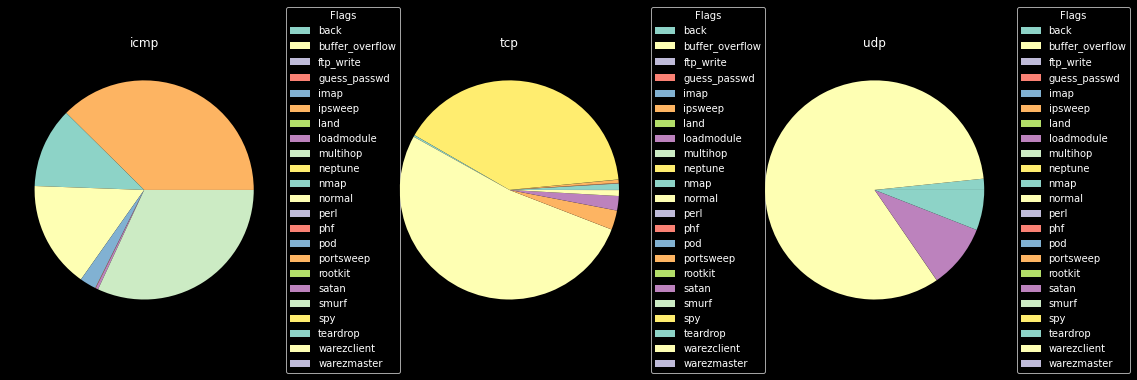

In [14]:
# atatck o n protocol 
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp

icmp_attacks.value_counts()
# create the charts
make_pie([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'])
plt.show()


In [15]:

# icmp_attacks.value_counts()

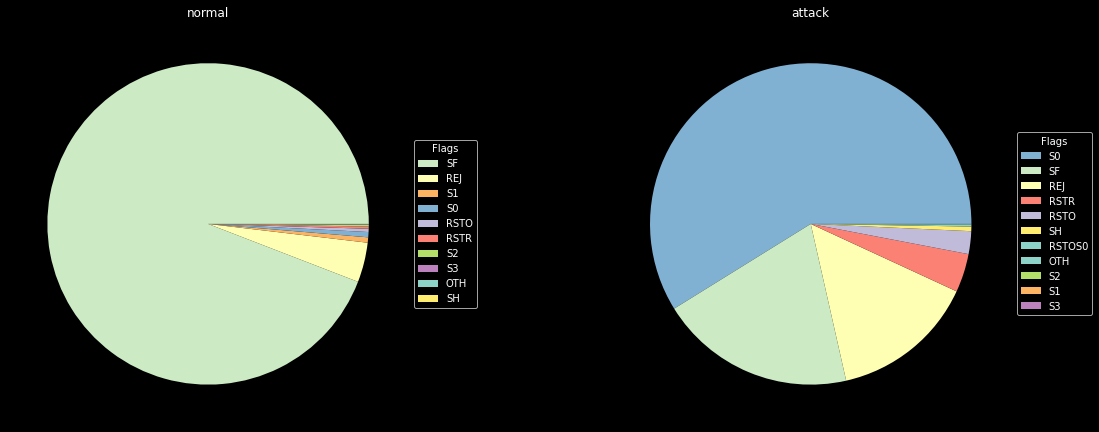

In [16]:
normal_flags = df.loc[df.attack_flag == 0].flag.value_counts()
attack_flags = df.loc[df.attack_flag == 1].flag.value_counts()

flag_axs = make_pie([normal_flags, attack_flags], ['normal','attack'])        
plt.show()

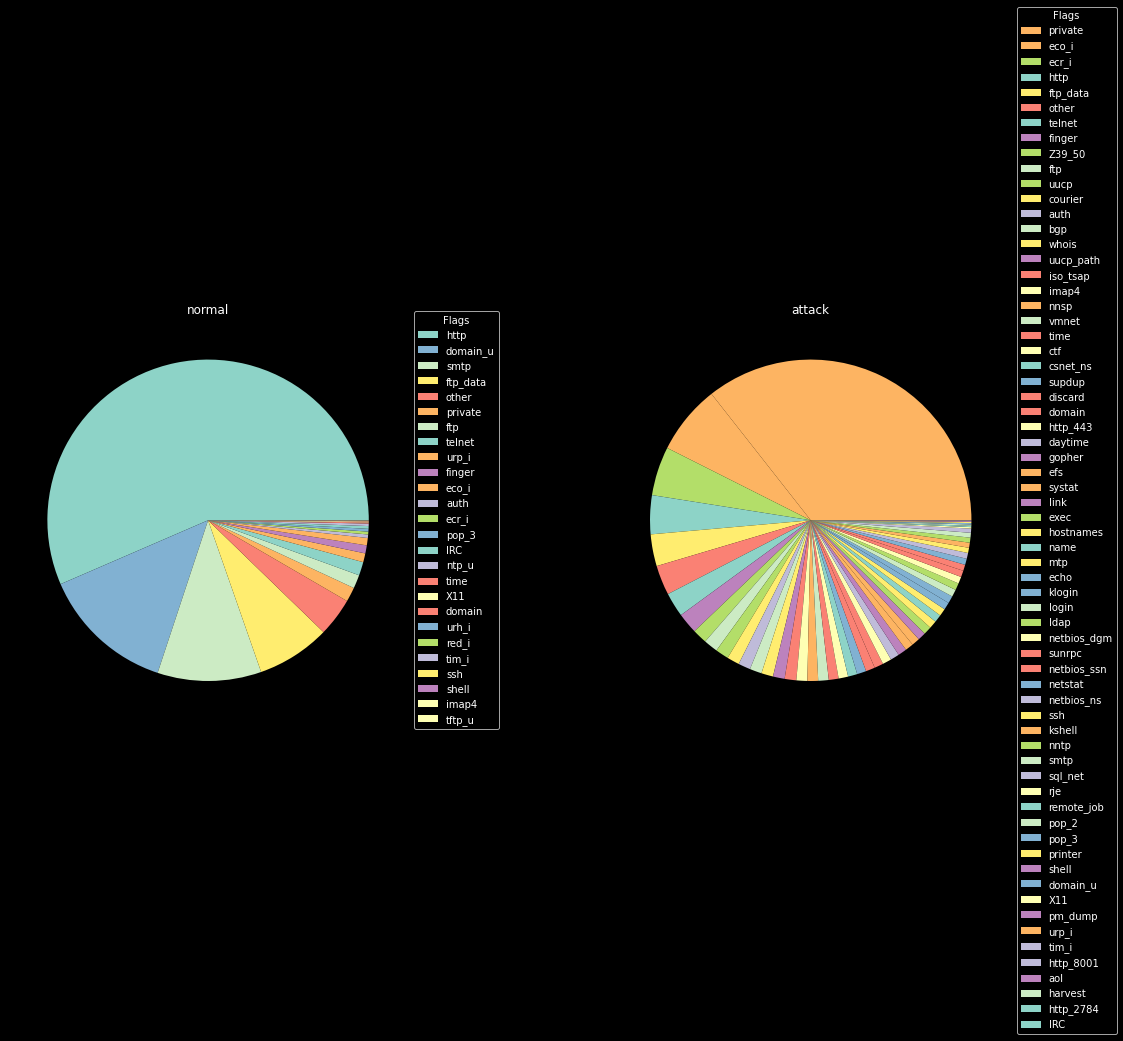

In [17]:
normal_services = df.loc[df.attack_flag == 0].service.value_counts()
attack_services = df.loc[df.attack_flag == 1].service.value_counts()

service_axs = make_pie([normal_services, attack_services], ['normal','attack'])        
plt.show()

In [18]:
print(list(test_df.columns))
test_df.head()

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'level', 'attack_flag', 'attack_map']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,0,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.28,0.00,0.0,0.00,0.00,saint,15,1,2
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11,1,2
4,0,tcp,http,SF,267,14515,0,0,0,0,...,0.01,0.03,0.01,0.0,0.00,0.00,normal,21,0,0


In [19]:
# Feature engineering

'''
s = pd.Series(list('abca'))
pd.get_dummies(s)
   a  b  c
0  1  0  0
1  0  1  0
2  0  0  1
3  1  0  0
'''

# encoding of categorical features w

features_to_encode = ['protocol_type', 'service', 'flag']
encoded = pd.get_dummies(df[features_to_encode])
test_encoded_base = pd.get_dummies(test_df[features_to_encode])

# not all of the features are in the test set
test_index = np.arange(len(test_df.index))
column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))
diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

# reorder the columns to match
train_column_order = encoded.columns.to_list()
test_encoded_temp = test_encoded_base.join(diff_df)
test_final = test_encoded_temp[train_column_order].fillna(0)


#  adding numerical features
numeric_features = ['duration', 'src_bytes', 'dst_bytes']

train_set = encoded.join(df[numeric_features])
test_set = test_final.join(test_df[numeric_features])
# print(train_set.head())

In [20]:
# more imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
binary_y = df['attack_flag']
multi_y = df['attack_map']

test_binary_y = test_df['attack_flag']
test_multi_y = test_df['attack_map']

# build the training sets
binary_train_X, binary_val_X, binary_train_y, binary_val_y = train_test_split(train_set, binary_y, test_size=0.7)
multi_train_X, multi_val_X, multi_train_y, multi_val_y = train_test_split(train_set, multi_y, test_size = 0.7)

In [22]:
# model fitting

#model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
# ##  binary classification "attack or not "

# models = [
#     RandomForestClassifier(n_estimators = 100, random_state = 42),
#     LogisticRegression(max_iter=500),
#     SVC(kernel= 'sigmoid',gamma='scale') 
# ]

# model_comps = []

# for model in models:
#     model_name = model.__class__.__name__
#     accuracies = cross_val_score(model, binary_train_X, binary_train_y, scoring='accuracy',cv = 10)
#     # by default 5 fold
    
#     for count, accuracy in enumerate(accuracies):
#         model_comps.append((model_name, count, accuracy))

In [ ]:
# model_comps

<AxesSubplot:>

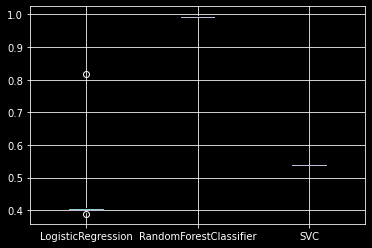

In [ ]:
result_df = pd.DataFrame(model_comps, columns=['model_name', 'count', 'accuracy'])
result_df.pivot(index='count',columns='model_name',values='accuracy').boxplot()

In [23]:

# HELPER FUNCTION FOR PREDICTION STASTS

# SORCE : Internet

def add_predictions(data_set,predictions,y):
    prediction_series = pd.Series(predictions, index=y.index)

    # we need to add the predicted and actual outcomes to the data
    predicted_vs_actual = data_set.assign(predicted=prediction_series)
    original_data = predicted_vs_actual.assign(actual=y).dropna()
    conf_matrix = confusion_matrix(original_data['actual'], 
                                   original_data['predicted'])
    
    clf_report = classification_report(original_data['actual'], 
                                   original_data['predicted'])
    
    # capture rows with failed predictions
    base_errors = original_data[original_data['actual'] != original_data['predicted']]
    
    # drop columns with no value
    non_zeros = base_errors.loc[:,(base_errors != 0).any(axis=0)]

    # idetify the type of error
    false_positives = non_zeros.loc[non_zeros.actual==0]
    false_negatives = non_zeros.loc[non_zeros.actual==1]

    # put everything into an object
    prediction_data = {'data': original_data,
                       'confusion_matrix': conf_matrix,
                       'errors': base_errors,
                       'non_zeros': non_zeros,
                       'false_positives': false_positives,
                       'false_negatives': false_negatives,
                       'classification_report' : clf_report
                       }
    
    return prediction_data

Accuracy RF : 0.9933205565824837


<AxesSubplot:>

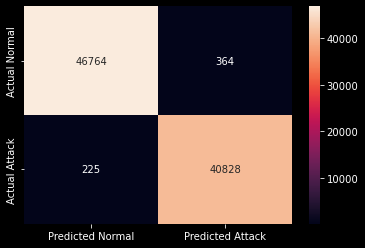

In [25]:
# RANDOM FOREST
binary_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
binary_model.fit(binary_train_X, binary_train_y)
binary_predictions = binary_model.predict(binary_val_X)

base_rf_score = accuracy_score(binary_predictions,binary_val_y)
print(f"Accuracy RF : {base_rf_score}")

binary_prediction_data = add_predictions(df,
                                         binary_predictions,
                                         binary_val_y)

sns.heatmap(data=binary_prediction_data['confusion_matrix'],
            xticklabels = ['Predicted Normal','Predicted Attack'],
            yticklabels = ['Actual Normal','Actual Attack'],
            fmt='d',
            annot=True)

In [26]:
print("RF : ",binary_prediction_data['classification_report'])

RF :                precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     47128
         1.0       0.99      0.99      0.99     41053

    accuracy                           0.99     88181
   macro avg       0.99      0.99      0.99     88181
weighted avg       0.99      0.99      0.99     88181



In [29]:
# SVC

binary_model =  SVC(kernel= 'sigmoid',gamma='scale') 
binary_model.fit(binary_train_X, binary_train_y)
binary_predictions = binary_model.predict(binary_val_X)

base_svc_score = accuracy_score(binary_predictions,binary_val_y)
print(f"Accuracy SVC : {base_svc_score}")

binary_prediction_data = add_predictions(df,
                                         binary_predictions,
                                         binary_val_y)

sns.heatmap(data=binary_prediction_data['confusion_matrix'],
            xticklabels = ['Predicted Normal','Predicted Attack'],
            yticklabels = ['Actual Normal','Actual Attack'],
            cmap="YlGnBu",
            fmt='d',
            annot=True)


In [ ]:
print("SVC : ",binary_prediction_data['classification_report'])

SVC :                precision    recall  f1-score   support

         0.0       0.53      1.00      0.70     47191
         1.0       0.00      0.00      0.00     40990

    accuracy                           0.53     88181
   macro avg       0.27      0.50      0.35     88181
weighted avg       0.29      0.53      0.37     88181



In [ ]:
# things to do next 
'''
# 1. normalization of the input [done]
2. adding more features to df [done]
2. PCA of numerical values [Remaining]
3. tuning hyperparameteres rigorously
4. train with neural networks ''' 

In [ ]:
#One-hot encoding
def one_hot(df, cols):
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(columns = [each], axis=1)
    return df

#Min - Max Normalization
def normalize(df, cols):
    
    result = df.copy() 
    for feature_name in cols:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if max_value > min_value:
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result


In [32]:
train_set.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,duration,src_bytes,dst_bytes
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,146,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,232,8153
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,199,420
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
multi_y.head()

0    0
1    1
2    0
3    0
4    1
Name: attack_map, dtype: int64

In [35]:
multi_train_X, multi_val_X, multi_train_y, multi_val_y = train_test_split(train_set, multi_y, test_size = 0.7)

Accuracy RF : 0.9766729794400154


<AxesSubplot:>

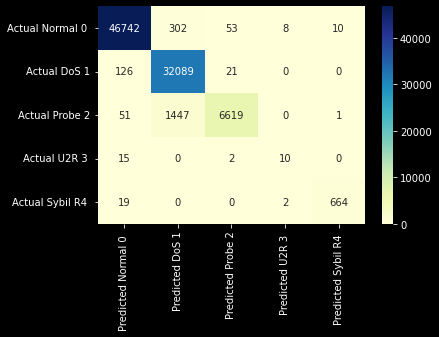

In [36]:
multi_class_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
multi_class_model.fit(multi_train_X, multi_train_y)
multi_class_predictions = multi_class_model.predict(multi_val_X)

base_rf_score = accuracy_score(multi_class_predictions ,multi_val_y)
print(f"Accuracy RF : {base_rf_score}")

multi_prediction_data = add_predictions(df,
                                         multi_class_predictions,
                                         multi_val_y)

sns.heatmap(data=multi_prediction_data['confusion_matrix'],
            xticklabels = ['Predicted ' + x for x in attack_labels],
            yticklabels = ['Actual ' + x for x in attack_labels],
            cmap="YlGnBu",
            fmt='d',
            annot=True)

In [37]:
print("RF : ",multi_prediction_data['classification_report'])

RF :                precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     47115
         1.0       0.95      1.00      0.97     32236
         2.0       0.99      0.82      0.89      8118
         3.0       0.50      0.37      0.43        27
         4.0       0.98      0.97      0.98       685

    accuracy                           0.98     88181
   macro avg       0.88      0.83      0.85     88181
weighted avg       0.98      0.98      0.98     88181



Accuracy SVC : 0.5314636939930371


C:\anaconda\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

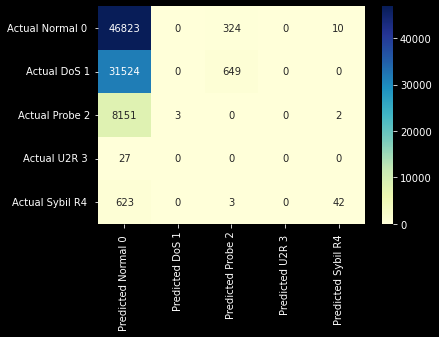

In [24]:
# 'scale' , i.e. gamma = 1 / (n_features * X)
multi_class_model =  SVC(kernel= 'sigmoid',gamma='scale') 
multi_class_model.fit(multi_train_X, multi_train_y)
multi_class_predictions = multi_class_model.predict(multi_val_X)

base_rf_score = accuracy_score(multi_class_predictions ,multi_val_y)
print(f"Accuracy SVC : {base_rf_score}")

multi_prediction_data = add_predictions(df,
                                         multi_class_predictions,
                                         multi_val_y)

sns.heatmap(data=multi_prediction_data['confusion_matrix'],
            xticklabels = ['Predicted ' + x for x in attack_labels],
            yticklabels = ['Actual ' + x for x in attack_labels],
            cmap="YlGnBu",
            fmt='d',
            annot=True)

In [25]:
print("SVC : ",multi_prediction_data['classification_report'])

SVC :                precision    recall  f1-score   support

         0.0       0.54      0.99      0.70     47157
         1.0       0.00      0.00      0.00     32173
         2.0       0.00      0.00      0.00      8156
         3.0       0.00      0.00      0.00        27
         4.0       0.78      0.06      0.12       668

    accuracy                           0.53     88181
   macro avg       0.26      0.21      0.16     88181
weighted avg       0.29      0.53      0.37     88181



In [24]:
### PCA  [ remaining ]